## 相关基础库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score


In [2]:
import sys
sys.path.append('..')  # 使上一级目录（即项目根目录）加入模块搜索路
from tools.evaluation import evaluate_model

## LogisticRegression

In [6]:
#预操作
data = pd.read_csv('/Users/lixian/workplace/dl_predictionv1/data/lucky_cat.csv')
y = data['risk']
X = data.drop('risk',axis=1)
print("X.shape", X.shape, "y.shape", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=246)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (39136, 37) y.shape (39136,)
X_train.shape (27395, 37) y_train.shape (27395,)
X_test.shape (11741, 37) y_test.shape (11741,)


In [7]:
#建模
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)

/Users/lixian/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# 获取模型的超参数
params = model_lg.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Evaluation Metrics for LogisticRegression:
训练集：
  Accuracy: 0.6373
  Precision: 0.6106
  Recall: 0.7511
  F1-Score: 0.6736
  AUC: 0.6742
测试集：
  Accuracy: 0.6348
  Precision: 0.6137
  Recall: 0.7429
  F1-Score: 0.6722
  AUC: 0.6686


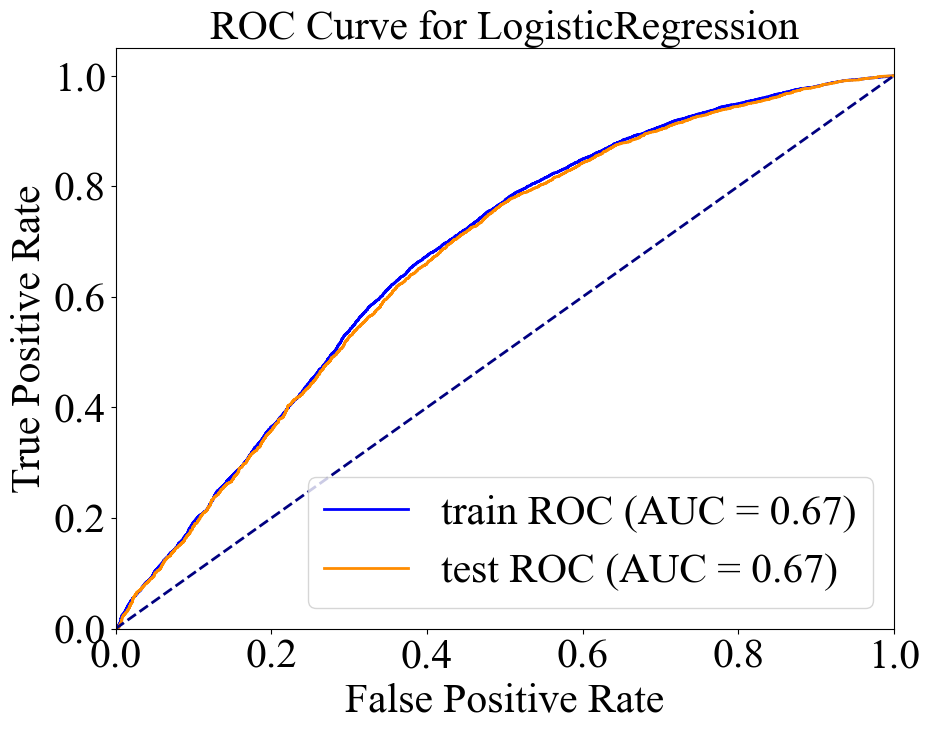

In [9]:
#获取评估指标
y_train_pred = model_lg.predict(X_train) #训练集预测标签
y_train_prob = model_lg.predict_proba(X_train)[:, 1] #训练集预测概率
y_test_pred = model_lg.predict(X_test)
y_test_prob =model_lg.predict_proba(X_test)[:, 1] #测试集预测为正的概率
metrics_lr = evaluate_model(y_train, y_train_pred, y_train_prob,
                            y_test, y_test_pred, y_test_prob, 
                            "LogisticRegression")

- LogisticRegression 模型在该数据集上表现中等，模型在训练集与测试集上的各项指标相近，表明模型具有较好的泛化能力，没有明显的过拟合或欠拟合现象

## DecisionTree

In [26]:
#预操作
from sklearn.model_selection import KFold
data = pd.read_csv('/Users/lixian/workplace/dl_predictionv1/data/lucky_cat.csv')
y = data['risk']
X = data.drop('risk',axis=1)
print("X.shape", X.shape, "y.shape", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=246)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

# 5折交叉验证
folds = 5
seed = 2020
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

X.shape (39136, 37) y.shape (39136,)
X_train.shape (27395, 37) y_train.shape (27395,)
X_test.shape (11741, 37) y_test.shape (11741,)


In [27]:
from sklearn.tree import DecisionTreeClassifier as DTC

# params = {
#     'criterion': 'entropy',
#     'splitter': 'best',   
#     'max_depth': 12,
#     'min_samples_split': 5,
#     'min_samples_leaf': 2,
#     'random_state': 2025
# }
    
# """使用训练集数据进行模型训练"""
# dtc = DTC(**params)
# dtc.fit(X_train, y_train)
dtc = DTC().fit(X_train, y_train)

In [12]:
# 获取模型的超参数
params = dtc.get_params()
print(params)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


Evaluation Metrics for DecisionTree:
训练集：
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  AUC: 1.0000
测试集：
  Accuracy: 0.8851
  Precision: 0.8802
  Recall: 0.8937
  F1-Score: 0.8869
  AUC: 0.8850


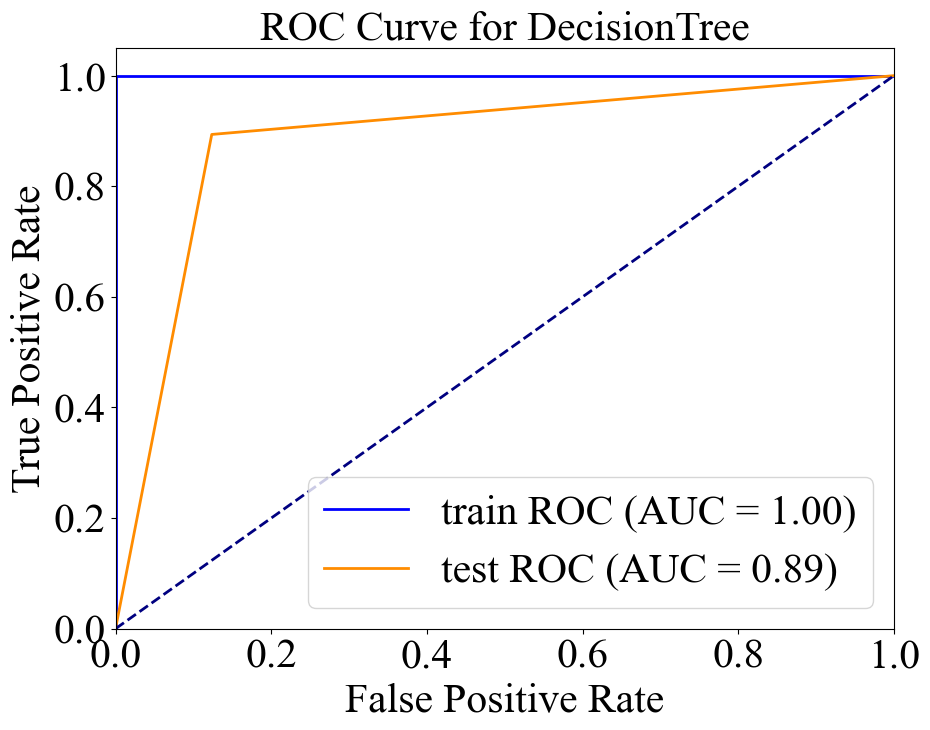

In [28]:
y_train_pred = dtc.predict(X_train) #训练集预测标签
y_train_prob = dtc.predict_proba(X_train)[:, 1] #训练集预测概率
y_test_pred = dtc.predict(X_test)
y_test_prob =dtc.predict_proba(X_test)[:, 1] #测试集预测为正的概率
metrics_dtc = evaluate_model(y_train, y_train_pred, y_train_prob,
                            y_test, y_test_pred, y_test_prob, 
                            "DecisionTree")

In [39]:
"""使用5折交叉验证进行建模评估"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X, y)):
    print('************************************ Fold {} ************************************'.format(i+1))
    # 划分训练集与验证集（DataFrame/Series形式）
    X_train_split, y_train_split = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[valid_index], y.iloc[valid_index]
    
    # 定义决策树模型的参数（字典形式），这里显式设置 criterion 参数
    # params = {
    #     'criterion': 'entropy',
    #     'splitter': 'best',   
    #     'max_depth': 12,
    #     'min_samples_split': 5,
    #     'min_samples_leaf': 2,
    #     'random_state': 2025
    # }
    
    # # 通过解包方式传入参数构建决策树模型
    # dtc = DTC(**params)
    # dtc.fit(X_train_split, y_train_split)
    dtc = DTC().fit(X_train_split, y_train_split)
    
    # 预测验证集正类概率（适用于二分类）
    y_val_pred = dtc.predict_proba(X_val)[:, 1]
    
    # 计算 ROC AUC 得分
    score = roc_auc_score(y_val, y_val_pred)
    cv_scores.append(score)
    print("Fold {} ROC AUC: {:.4f}".format(i+1, score))
    print("当前 cv_scores:", cv_scores)

print("决策树 5折交叉验证 AUC scores: {}".format(cv_scores))
print("平均 ROC AUC: {:.4f}".format(np.mean(cv_scores)))
print("ROC AUC 标准差: {:.4f}".format(np.std(cv_scores)))

************************************ Fold 1 ************************************
Fold 1 ROC AUC: 0.8889
当前 cv_scores: [0.8888897158053506]
************************************ Fold 2 ************************************
Fold 2 ROC AUC: 0.8920
当前 cv_scores: [0.8888897158053506, 0.892005648514911]
************************************ Fold 3 ************************************
Fold 3 ROC AUC: 0.8846
当前 cv_scores: [0.8888897158053506, 0.892005648514911, 0.8845890226251825]
************************************ Fold 4 ************************************
Fold 4 ROC AUC: 0.8975
当前 cv_scores: [0.8888897158053506, 0.892005648514911, 0.8845890226251825, 0.8975302439100832]
************************************ Fold 5 ************************************
Fold 5 ROC AUC: 0.8868
当前 cv_scores: [0.8888897158053506, 0.892005648514911, 0.8845890226251825, 0.8975302439100832, 0.8867651977292522]
决策树 5折交叉验证 AUC scores: [0.8888897158053506, 0.892005648514911, 0.8845890226251825, 0.8975302439100832, 0.8867

### 贝叶斯调参

In [40]:
from sklearn.model_selection import cross_val_score
#定义优化函数
def dt_objective(max_depth, min_samples_split, min_samples_leaf):
    # 建立模型
    dtc = DTC(
        criterion='entropy',
        splitter='best', 
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42)
    val = cross_val_score(dtc, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return val

In [15]:
from bayes_opt import BayesianOptimization
"""定义优化参数"""

bayes_dtc = BayesianOptimization(
   dt_objective,   
     {
    'max_depth': (1, 20),          # 决策树最大深度在1到20之间
    'min_samples_split': (2, 20),  # 分裂所需最小样本数在2到20之间
    'min_samples_leaf': (1, 10)    # 叶节点最小样本数在1到10之间
        },
    random_state=2025,  # 固定随机种子
    verbose=2         # 打印所有过程信息
)

"""开始优化"""
bayes_dtc.maximize(n_iter=10)

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.8341    | 3.574     | 8.991     | 18.79     |
| 2         | 0.9404    | 9.466     | 4.494     | 6.637     |
| 3         | 0.9431    | 13.49     | 5.434     | 19.36     |
| 4         | 0.9358    | 16.22     | 5.097     | 16.42     |
| 5         | 0.6764    | 1.793     | 7.925     | 2.057     |
| 6         | 0.9428    | 11.74     | 1.408     | 12.01     |
| 7         | 0.9077    | 18.29     | 2.429     | 4.383     |
| 8         | 0.944     | 14.65     | 9.903     | 9.009     |
| 9         | 0.9397    | 19.55     | 9.481     | 19.95     |
| 10        | 0.929     | 19.46     | 1.254     | 19.85     |
| 11        | 0.9401    | 18.58     | 9.753     | 2.105     |
| 12        | 0.9397    | 19.92     | 9.757     | 10.45     |
| 13        | 0.9331    | 7.504     | 1.039     | 19.65     |
| 14        | 0.9365    | 12.26     | 1.291     | 2.252     |
| 15    

In [16]:
"""显示优化结果"""
bayes_dtc.max

{'target': 0.9440349156502107,
 'params': {'max_depth': 14.645775475938258,
  'min_samples_leaf': 9.902852702676874,
  'min_samples_split': 9.00860243133965}}

**模型参数已经确定，建立最终模型并对验证集进行验证**

In [16]:
"""使用5折交叉验证进行建模评估"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X, y)):
    print('************************************ Fold {} ************************************'.format(i+1))
    # 划分训练集与验证集（DataFrame/Series形式）
    X_train_split, y_train_split = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[valid_index], y.iloc[valid_index]
    
    # 定义决策树模型的参数（字典形式），这里显式设置 criterion 参数
    params = {
        'criterion': 'entropy',
        'splitter': 'best',   
        'max_depth': 15,
        'min_samples_split': 9,
        'min_samples_leaf': 10,
        'random_state': 2025
    }
    
    # 通过解包方式传入参数构建决策树模型
    dtc = DTC(**params)
    dtc.fit(X_train_split, y_train_split)
    
    # 预测验证集正类概率（适用于二分类）
    y_val_pred = dtc.predict_proba(X_val)[:, 1]
    
    # 计算 ROC AUC 得分
    score = roc_auc_score(y_val, y_val_pred)
    cv_scores.append(score)
    print("Fold {} ROC AUC: {:.4f}".format(i+1, score))
    print("当前 cv_scores:", cv_scores)

print("决策树 5折交叉验证 AUC scores: {}".format(cv_scores))
print("平均 ROC AUC: {:.4f}".format(np.mean(cv_scores)))
print("ROC AUC 标准差: {:.4f}".format(np.std(cv_scores)))

************************************ Fold 1 ************************************
Fold 1 ROC AUC: 0.9492
当前 cv_scores: [0.9491628188938053]
************************************ Fold 2 ************************************
Fold 2 ROC AUC: 0.9483
当前 cv_scores: [0.9491628188938053, 0.9482758800812998]
************************************ Fold 3 ************************************
Fold 3 ROC AUC: 0.9492
当前 cv_scores: [0.9491628188938053, 0.9482758800812998, 0.9492113292155957]
************************************ Fold 4 ************************************
Fold 4 ROC AUC: 0.9509
当前 cv_scores: [0.9491628188938053, 0.9482758800812998, 0.9492113292155957, 0.9508821140440915]
************************************ Fold 5 ************************************
Fold 5 ROC AUC: 0.9456
当前 cv_scores: [0.9491628188938053, 0.9482758800812998, 0.9492113292155957, 0.9508821140440915, 0.9455718092209269]
决策树 5折交叉验证 AUC scores: [0.9491628188938053, 0.9482758800812998, 0.9492113292155957, 0.9508821140440915, 0

Evaluation Metrics for DecisionTree:
训练集：
  Accuracy: 0.9282
  Precision: 0.9505
  Recall: 0.9030
  F1-Score: 0.9261
  AUC: 0.9795
测试集：
  Accuracy: 0.9204
  Precision: 0.9477
  Recall: 0.8913
  F1-Score: 0.9187
  AUC: 0.9766


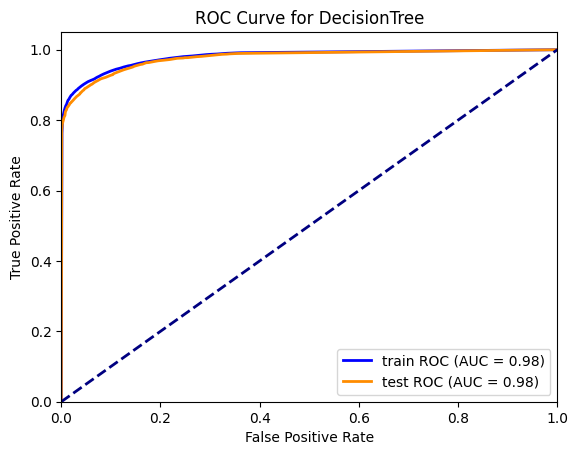

In [18]:
y_train_pred = dtc.predict(X_train) #训练集预测标签
y_train_prob = dtc.predict_proba(X_train)[:, 1] #训练集预测概率
y_test_pred = dtc.predict(X_test)
y_test_prob = dtc.predict_proba(X_test)[:, 1] #测试集预测为正的概率
metrics_dtc = evaluate_model(y_train, y_train_pred, y_train_prob,
                            y_test, y_test_pred, y_test_prob, 
                            "DecisionTree")

In [18]:
from sklearn.tree import DecisionTreeClassifier as DTC

params = {
    'criterion': 'entropy',
    'splitter': 'best',   
    'max_depth': 15,
    'min_samples_split': 9,
    'min_samples_leaf': 10,
    'random_state': 2025
}
    
"""使用训练集数据进行模型训练"""
final_dtc = DTC(**params)
final_dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=10,
                       min_samples_split=9, random_state=2025)

Evaluation Metrics for DecisionTree:
训练集：
  Accuracy: 0.9344
  Precision: 0.9599
  Recall: 0.9062
  F1-Score: 0.9322
  AUC: 0.9862
测试集：
  Accuracy: 0.8944
  Precision: 0.9242
  Recall: 0.8611
  F1-Score: 0.8915
  AUC: 0.9461


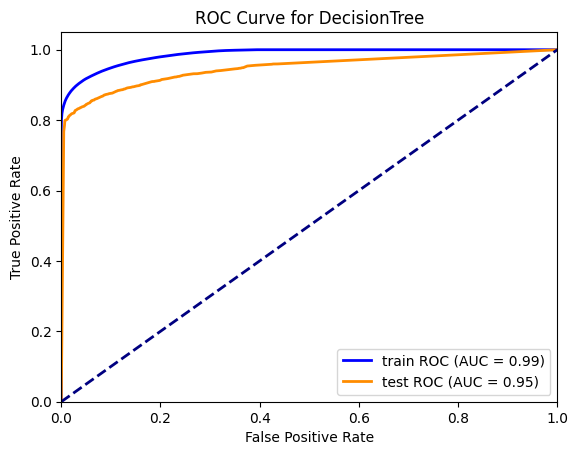

In [19]:
y_train_pred = final_dtc.predict(X_train) #训练集预测标签
y_train_prob = final_dtc.predict_proba(X_train)[:, 1] #训练集预测概率
y_test_pred = final_dtc.predict(X_test)
y_test_prob =final_dtc.predict_proba(X_test)[:, 1] #测试集预测为正的概率
metrics_dtc = evaluate_model(y_train, y_train_pred, y_train_prob,
                            y_test, y_test_pred, y_test_prob, 
                            "DecisionTree")

In [14]:
"""保存模型到本地"""
# 保存模型
import pickle
pickle.dump(final_dtc, open('/Users/lixian/workplace/dl_predictionv1/model/model_dtc_best.pkl', 'wb'))

## RandomForest

In [29]:
#预操作
from sklearn.model_selection import KFold
data = pd.read_csv('/Users/lixian/workplace/dl_predictionv1/data/lucky_cat.csv')
y = data['risk']
X = data.drop('risk',axis=1)
print("X.shape", X.shape, "y.shape", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=246)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

# 5折交叉验证
folds = 5
seed = 2020
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

X.shape (39136, 37) y.shape (39136,)
X_train.shape (27395, 37) y_train.shape (27395,)
X_test.shape (11741, 37) y_test.shape (11741,)


In [30]:
from sklearn.ensemble import RandomForestClassifier as RFC

params = {
    'n_estimators':100 , 
    'max_features':'auto', 
    'max_depth':10 , 
    'min_samples_leaf': 5, 
    'min_samples_split':6 ,
    'criterion':'entropy',
    'random_state':2025,    
}
    
"""使用训练集数据进行模型训练"""
rfc = RFC(**params)
rfc = RFC().fit(X_train,y_train)

Evaluation Metrics for RandomForest:
训练集：
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  AUC: 1.0000
测试集：
  Accuracy: 0.9358
  Precision: 0.9848
  Recall: 0.8863
  F1-Score: 0.9329
  AUC: 0.9820


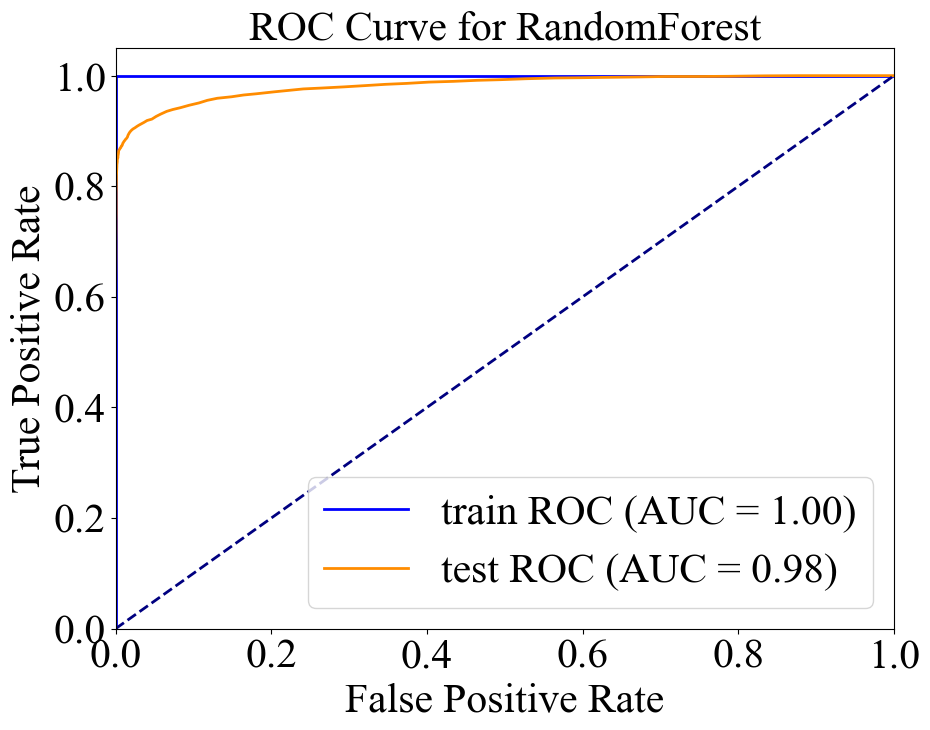

In [31]:
y_train_pred = rfc.predict(X_train) #训练集预测标签
y_train_prob = rfc.predict_proba(X_train)[:, 1] #训练集预测概率
y_test_pred = rfc.predict(X_test)
y_test_prob =rfc.predict_proba(X_test)[:, 1] #测试集预测为正的概率
metrics_rfc = evaluate_model(y_train, y_train_pred, y_train_prob,
                            y_test, y_test_pred, y_test_prob, 
                            "RandomForest")

- 训练集指标都为1出现了过拟合
- 测试集AUC过高

In [6]:
"""使用5折交叉验证进行建模评估"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X, y)):
    print('************************************ Fold {} ************************************'.format(i+1))
    # 划分训练集与验证集（DataFrame/Series形式）
    X_train_split, y_train_split = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[valid_index], y.iloc[valid_index]
    
    # 定义决策树模型的参数（字典形式），这里显式设置 criterion 参数
    params = {
        'n_estimators':100 , 
        'max_features':0.7, 
        'max_depth':10 , 
        'min_samples_leaf': 5, 
        'min_samples_split':6 ,
        'criterion':'entropy',
        'random_state':2025,    
    }
    
    # 通过解包方式传入参数构建决策树模型
    rfc = RFC(**params)
    rfc.fit(X_train_split, y_train_split)
    
    # 预测验证集正类概率（适用于二分类）
    y_val_pred = rfc.predict_proba(X_val)[:, 1]
    
    # 计算 ROC AUC 得分
    score = roc_auc_score(y_val, y_val_pred)
    cv_scores.append(score)
    print("Fold {} ROC AUC: {:.4f}".format(i+1, score))
    print("当前 cv_scores:", cv_scores)

print("决策树 5折交叉验证 AUC scores: {}".format(cv_scores))
print("平均 ROC AUC: {:.4f}".format(np.mean(cv_scores)))
print("ROC AUC 标准差: {:.4f}".format(np.std(cv_scores)))

************************************ Fold 1 ************************************
Fold 1 ROC AUC: 0.9714
当前 cv_scores: [0.9714126601258445]
************************************ Fold 2 ************************************
Fold 2 ROC AUC: 0.9686
当前 cv_scores: [0.9714126601258445, 0.9686202104370202]
************************************ Fold 3 ************************************
Fold 3 ROC AUC: 0.9700
当前 cv_scores: [0.9714126601258445, 0.9686202104370202, 0.9700147869242479]
************************************ Fold 4 ************************************
Fold 4 ROC AUC: 0.9724
当前 cv_scores: [0.9714126601258445, 0.9686202104370202, 0.9700147869242479, 0.9723826481442305]
************************************ Fold 5 ************************************
Fold 5 ROC AUC: 0.9696
当前 cv_scores: [0.9714126601258445, 0.9686202104370202, 0.9700147869242479, 0.9723826481442305, 0.9695604654069307]
决策树 5折交叉验证 AUC scores: [0.9714126601258445, 0.9686202104370202, 0.9700147869242479, 0.9723826481442305, 0

### 使用贝叶斯调参

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
#定义优化函数
def rfc_objective(n_estimators, max_depth, min_samples_split, max_features, min_samples_leaf):
    rfc = RFC(
                n_estimators=int(max(n_estimators,0)),                                                               
                max_depth=int(max(max_depth,1)),
                min_samples_split=int(max(min_samples_split,2)), 
                max_features = min(max_features, 0.999),  # 确保不超过1
                min_samples_leaf = int(min_samples_leaf),
                n_jobs=-1, 
                random_state=2025,   
            )
    val = cross_val_score(rfc,X_train, y_train, cv=5 ,scoring="roc_auc",n_jobs=-1).mean()
    return val

In [7]:
from bayes_opt import BayesianOptimization
"""定义优化参数"""

bayes_rfc = BayesianOptimization(
   rfc_objective,   
     {
        'n_estimators': (100, 500),         # 决策树的数量
        'max_depth': (3, 15),              # 树的最大深度
        'min_samples_split': (10, 50),      # 内部节点分裂所需的最小样本数
        'max_features': (0.1, 0.7),       # 每次分裂考虑的最大特征比例
        'min_samples_leaf': (5, 20),       # 叶节点最少样本数
        },
    random_state=2025,  # 固定随机种子
    verbose=2         # 打印所有过程信息
)

"""开始优化"""
bayes_rfc.maximize(n_iter=10)

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.9271    | 4.626     | 0.6327    | 18.99     | 27.82     | 255.3     |
| 2         | 0.9565    | 6.091     | 0.4944    | 12.39     | 48.57     | 420.4     |
| 3         | 0.9651    | 8.462     | 0.5806    | 5.626     | 40.78     | 101.3     |
| 4         | 0.9571    | 6.514     | 0.4665    | 18.7      | 22.0      | 199.4     |
| 5         | 0.9688    | 11.0      | 0.6925    | 12.02     | 14.93     | 466.4     |
| 6         | 0.9695    | 9.178     | 0.1811    | 13.09     | 14.81     | 465.7     |
| 7         | 0.9506    | 5.166     | 0.485     | 16.89     | 45.16     | 498.6     |
| 8         | 0.9707    | 12.78     | 0.513     | 19.19     | 10.57     | 138.0     |
| 9         | 0.9533    | 5.763     | 0.174     | 11.71     | 49.89     | 149.9     |
| 10        | 0.9301    | 4.688     | 0.6043    | 19.8

In [8]:
"""显示优化结果"""
bayes_rfc.max

{'target': 0.9725799070305536,
 'params': {'max_depth': 14.569632259705436,
  'max_features': 0.2803408120180015,
  'min_samples_leaf': 19.87454562552798,
  'min_samples_split': 11.058795562368449,
  'n_estimators': 154.43376341328428}}

**模型参数已经确定，建立最终模型并对验证集进行验证**

In [11]:
"""使用5折交叉验证进行建模评估"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X, y)):
    print('************************************ Fold {} ************************************'.format(i+1))
    # 划分训练集与验证集（DataFrame/Series形式）
    X_train_split, y_train_split = X.iloc[train_index], y.iloc[train_index]
    X_val, y_val = X.iloc[valid_index], y.iloc[valid_index]
    
    # 定义决策树模型的参数（字典形式），这里显式设置 criterion 参数
    params = {
        'n_estimators':154, 
        'max_features':0.28, 
        'max_depth':15, 
        'min_samples_leaf': 20, 
        'min_samples_split':11,
        'criterion':'entropy',
        'random_state':2025,    
    }
    
    # 通过解包方式传入参数构建决策树模型
    rfc = RFC(**params)
    rfc.fit(X_train_split, y_train_split)
    
    # 预测验证集正类概率（适用于二分类）
    y_val_pred = rfc.predict_proba(X_val)[:, 1]
    
    # 计算 ROC AUC 得分
    score = roc_auc_score(y_val, y_val_pred)
    cv_scores.append(score)
    print("Fold {} ROC AUC: {:.4f}".format(i+1, score))
    print("当前 cv_scores:", cv_scores)

print("决策树 5折交叉验证 AUC scores: {}".format(cv_scores))
print("平均 ROC AUC: {:.4f}".format(np.mean(cv_scores)))
print("ROC AUC 标准差: {:.4f}".format(np.std(cv_scores)))

************************************ Fold 1 ************************************
Fold 1 ROC AUC: 0.9756
当前 cv_scores: [0.9755614196989257]
************************************ Fold 2 ************************************
Fold 2 ROC AUC: 0.9742
当前 cv_scores: [0.9755614196989257, 0.9741786186459757]
************************************ Fold 3 ************************************
Fold 3 ROC AUC: 0.9747
当前 cv_scores: [0.9755614196989257, 0.9741786186459757, 0.9747322245120792]
************************************ Fold 4 ************************************
Fold 4 ROC AUC: 0.9764
当前 cv_scores: [0.9755614196989257, 0.9741786186459757, 0.9747322245120792, 0.9764290769861604]
************************************ Fold 5 ************************************
Fold 5 ROC AUC: 0.9742
当前 cv_scores: [0.9755614196989257, 0.9741786186459757, 0.9747322245120792, 0.9764290769861604, 0.9742060198664971]
决策树 5折交叉验证 AUC scores: [0.9755614196989257, 0.9741786186459757, 0.9747322245120792, 0.9764290769861604, 0

Evaluation Metrics for RandomForest:
训练集：
  Accuracy: 0.9373
  Precision: 0.9879
  Recall: 0.8851
  F1-Score: 0.9337
  AUC: 0.9864
测试集：
  Accuracy: 0.9333
  Precision: 0.9862
  Recall: 0.8800
  F1-Score: 0.9301
  AUC: 0.9865


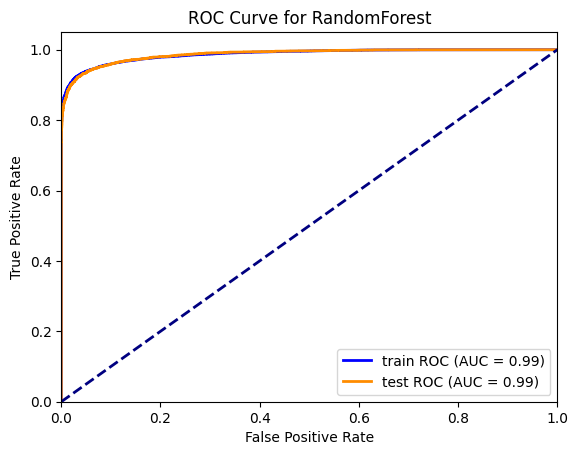

In [12]:
y_train_pred = rfc.predict(X_train) #训练集预测标签
y_train_prob = rfc.predict_proba(X_train)[:, 1] #训练集预测概率
y_test_pred = rfc.predict(X_test)
y_test_prob =rfc.predict_proba(X_test)[:, 1] #测试集预测为正的概率
metrics_rfc = evaluate_model(y_train, y_train_pred, y_train_prob,
                            y_test, y_test_pred, y_test_prob, 
                            "RandomForest")

In [9]:
from sklearn.ensemble import RandomForestClassifier as RFC

params = {
    'n_estimators':154, 
    'max_features':0.28, 
    'max_depth':15, 
    'min_samples_leaf': 20, 
    'min_samples_split':11,
    'criterion':'entropy',
    'random_state':2025,    
}
    
"""使用训练集数据进行模型训练"""
final_rfc = RFC(**params)
final_rfc = RFC().fit(X_train,y_train)

Evaluation Metrics for RandomForest:
训练集：
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  AUC: 1.0000
测试集：
  Accuracy: 0.9379
  Precision: 0.9858
  Recall: 0.8896
  F1-Score: 0.9352
  AUC: 0.9813


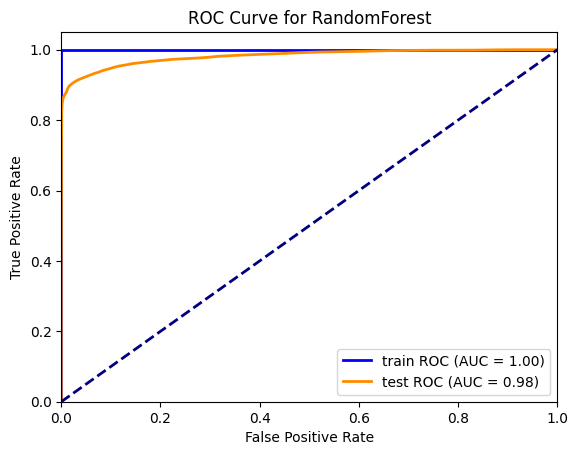

In [10]:
y_train_pred = final_rfc.predict(X_train) #训练集预测标签
y_train_prob = final_rfc.predict_proba(X_train)[:, 1] #训练集预测概率
y_test_pred = final_rfc.predict(X_test)
y_test_prob =final_rfc.predict_proba(X_test)[:, 1] #测试集预测为正的概率
metrics_rfc = evaluate_model(y_train, y_train_pred, y_train_prob,
                            y_test, y_test_pred, y_test_prob, 
                            "RandomForest")

In [13]:
"""保存模型到本地"""
# 保存模型
import pickle
pickle.dump(rfc, open('/Users/lixian/workplace/dl_predictionv1/model/model_rfc_best.pkl', 'wb'))

## Light GBM

In [3]:
#预操作
from sklearn.model_selection import KFold
data = pd.read_csv('/Users/lixian/workplace/dl_predictionv1/data/lucky_cat.csv')
y = data['risk']
X = data.drop('risk',axis=1)
print("X.shape", X.shape, "y.shape", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=246)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

# 5折交叉验证
folds = 5
seed = 2020
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)


X.shape (39136, 37) y.shape (39136,)
X_train.shape (27395, 37) y_train.shape (27395,)
X_test.shape (11741, 37) y_test.shape (11741,)


In [4]:
import lightgbm as lgb

train_matrix = lgb.Dataset(X_train, label=y_train)
valid_matrix= lgb.Dataset(X_test, label=y_test)

params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'learning_rate': 0.1,
            'metric': 'auc',
            'min_child_weight': 1e-3,
            'num_leaves': 31,
            'max_depth': -1,
            'reg_lambda': 0,
            'reg_alpha': 0,
            'feature_fraction': 1,
            'bagging_fraction': 1,
            'bagging_freq': 0,
            'seed': 2020,
            'nthread': 8,
            'silent': True,
            'verbose': -1,  # Use 'verbose' instead of 'verbose_eval'
}

"""使用训练集数据进行模型训练"""
lgbm = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=20000, callbacks=[lgb.early_stopping(stopping_rounds=200)])

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.972727


Evaluation Metrics for Light BGM:
训练集：
  Accuracy: 0.9530
  Precision: 0.9952
  Recall: 0.9101
  F1-Score: 0.9508
  AUC: 0.9946
测试集：
  Accuracy: 0.9323
  Precision: 0.9841
  Recall: 0.8798
  F1-Score: 0.9291
  AUC: 0.9727


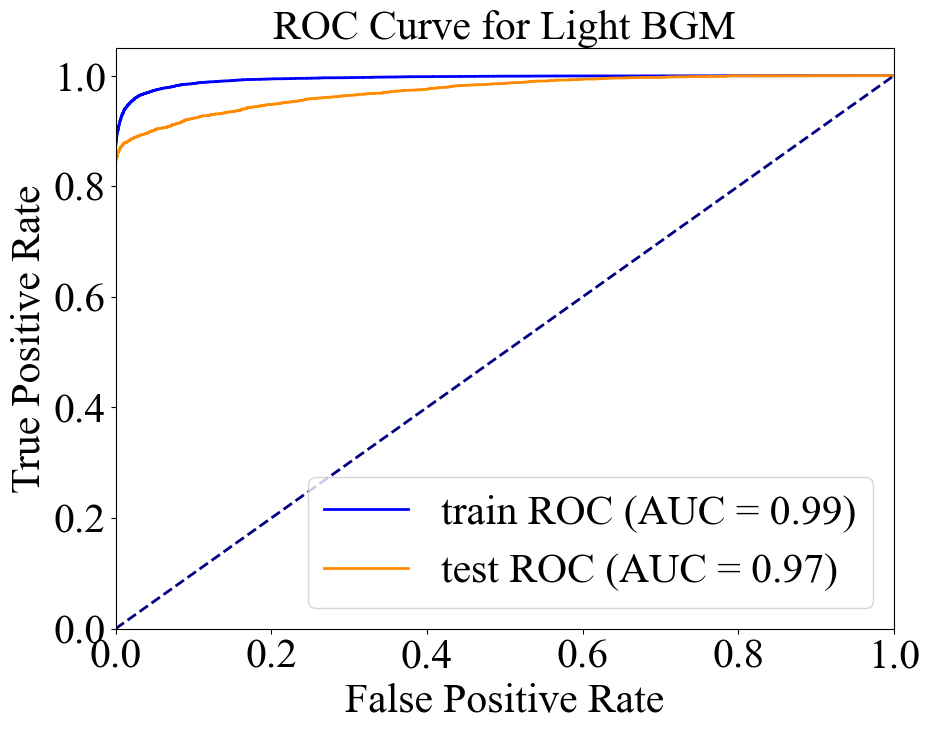

In [5]:
#对验证集进行预测
y_train_prob = lgbm.predict(X_train, num_iteration=lgbm.best_iteration)  #训练集预测概率
y_train_pred = (y_train_prob > 0.5).astype(int)  #训练集预测标签
y_test_prob = lgbm.predict(X_test, num_iteration=lgbm.best_iteration)  #测试集预测概率
y_test_pred = (y_test_prob > 0.5).astype(int)  #测试集预测标签
metrics_lgb = evaluate_model(y_train, y_train_pred, y_train_prob,
                            y_test, y_test_pred, y_test_prob, 
                            "Light BGM")


In [7]:
"""使用lightgbm 5折交叉验证进行建模评估"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X ,y)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X.iloc[train_index], y.iloc[train_index], X.iloc[valid_index], y.iloc[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'learning_rate': 0.1,
                'metric': 'auc',
                'min_child_weight': 1e-3,
                'num_leaves': 31,
                'max_depth': -1,
                'reg_lambda': 0,
                'reg_alpha': 0,
                'feature_fraction': 1,
                'bagging_fraction': 1,
                'bagging_freq': 0,
                'seed': 2020,
                'nthread': 8,
                'silent': True,
                'verbose': -1,
    }
    
    lgbm = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=20000, callbacks=[lgb.early_stopping(stopping_rounds=200)])    
    y_test_pred = lgbm.predict(X_val, num_iteration=lgbm.best_iteration)
    cv_scores.append(roc_auc_score(y_val, y_test_pred))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.97364
[0.9736395570373898]
************************************ 2 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[292]	valid_0's auc: 0.973152
[0.9736395570373898, 0.9731519898955128]
************************************ 3 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[101]	valid_0's auc: 0.973034
[0.9736395570373898, 0.9731519898955128, 0.9730343988285381]
************************************ 4 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[154]	valid_0's auc: 0.975806
[0.9736395570373898, 0.9731519898955128, 0.9730343988285381, 0.975

- 没有过拟合
- 测试集AUC仍然过高

#### 贝叶斯调参

In [8]:
from sklearn.model_selection import cross_val_score

"""定义优化函数"""
def rf_cv_lgb(num_leaves, max_depth, bagging_fraction, feature_fraction, bagging_freq, min_data_in_leaf, 
              min_child_weight, min_split_gain, reg_lambda, reg_alpha):
    # 建立模型
    model_lgb = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='auc',
                                   learning_rate=0.1, n_estimators=5000,
                                   num_leaves=int(num_leaves), max_depth=int(max_depth), 
                                   bagging_fraction=round(bagging_fraction, 2), feature_fraction=round(feature_fraction, 2),
                                   bagging_freq=int(bagging_freq), min_data_in_leaf=int(min_data_in_leaf),
                                   min_child_weight=min_child_weight, min_split_gain=min_split_gain,
                                   reg_lambda=reg_lambda, reg_alpha=reg_alpha,
                                   n_jobs= 8
                                  )
    
    val = cross_val_score(model_lgb, X, y, cv=5, scoring='roc_auc').mean()
    
    return val

In [9]:
from bayes_opt import BayesianOptimization
"""定义优化参数"""
bayes_lgb = BayesianOptimization(
    rf_cv_lgb, 
    {
        'num_leaves':(10, 200),#
        'max_depth':(3, 20),
        'bagging_fraction':(0.5, 1.0),
        'feature_fraction':(0.5, 1.0),
        'bagging_freq':(0, 100),
        'min_data_in_leaf':(10,100),
        'min_child_weight':(0, 10),
        'min_split_gain':(0.0, 1.0),
        'reg_alpha':(0.0, 10),#
        'reg_lambda':(0.0, 10),
    }
)

"""开始优化"""
bayes_lgb.maximize(n_iter=10)

|   iter    |  target   | baggin... | baggin... | featur... | max_depth | min_ch... | min_da... | min_sp... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.8722    | 0.6848    | 26.5      | 0.8329    | 3.403     | 6.915     | 35.11     | 0.09818   | 190.0     | 2.405     | 1.162     |
| 2         | 0.8656    | 0.7043    | 88.95     | 0.6099    | 6.211     | 1.65      | 15.71     | 0.7945    | 197.4     | 1.171     | 6.991     |
| 3         | 0.8678    | 0.7242    | 17.72     | 0.5364    | 3.248     | 5.605     | 35.11     | 0.9076    | 198.8     | 7.086     | 1.36      |
| 4         | 0.8699    | 0.6745    | 94.61     | 0.6478    | 7.92      | 0.4505    | 92.99     | 0.4622    | 73.05     | 9.963     | 1.082     |
| 5         | 0.8688    | 0.7352    | 15.05     | 0.9902    | 11.06     | 9.103     | 24.33     | 0.1449    | 18.46     | 4.

In [10]:
"""显示优化结果"""
bayes_lgb.max#结果具有随机性，下面是其中的一种能够调优的结果

{'target': 0.8724702562351918,
 'params': {'bagging_fraction': 0.6977794962974797,
  'bagging_freq': 16.70721052845797,
  'feature_fraction': 0.5681343842297024,
  'max_depth': 8.521130671683649,
  'min_child_weight': 5.40962256983743,
  'min_data_in_leaf': 23.201339639600366,
  'min_split_gain': 0.09118879152475634,
  'num_leaves': 18.14516239271923,
  'reg_alpha': 5.451283491139223,
  'reg_lambda': 5.8899099083279}}

In [11]:
"""调整一个较小的学习率，并通过cv函数确定当前最优的迭代次数"""
base_params_lgb = {
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'learning_rate': 0.01,
                    'num_leaves': 18,
                    'max_depth': 9,
                    'min_data_in_leaf': 23,
                    'min_child_weight':5.4,
                    'bagging_fraction': 0.7,
                    'feature_fraction': 0.57,
                    'bagging_freq': 17,
                    'reg_lambda': 5.9,
                    'reg_alpha': 5.5,
                    'min_split_gain': 0.1,
                    'nthread': 8,
                    'seed': 2020,
                    'silent': True,
                    'verbose': -1,
}


cv_result_lgb = lgb.cv(
    train_set=train_matrix,
    num_boost_round=20000,
    nfold=5,
    stratified=True,
    shuffle=True,
    params=base_params_lgb,
    metrics='auc',
    seed=0,
    callbacks=[lgb.early_stopping(stopping_rounds=1000)]
)

print('迭代次数{}'.format(len(cv_result_lgb['valid auc-mean'])))
print('最终模型的AUC为{}'.format(max(cv_result_lgb['valid auc-mean'])))

Training until validation scores don't improve for 1000 rounds
Early stopping, best iteration is:
[2126]	cv_agg's valid auc: 0.972598 + 0.00166316
迭代次数2126
最终模型的AUC为0.9725981773427975


##### 建立最终模型并对验证集进行验证

In [7]:
"""使用lightgbm 5折交叉验证进行建模预测"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X ,y)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X.iloc[train_index], y.iloc[train_index], X.iloc[valid_index], y.iloc[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    base_params_lgb = {
                    'boosting_type': 'gbdt',
                    'objective': 'binary',
                    'metric': 'auc',
                    'learning_rate': 0.01,
                    'num_leaves': 18,
                    'max_depth': 9,
                    'min_data_in_leaf': 23,
                    'min_child_weight':5.4,
                    'bagging_fraction': 0.7,
                    'feature_fraction': 0.57,
                    'bagging_freq': 17,
                    'reg_lambda': 5.9,
                    'reg_alpha': 5.5,
                    'min_split_gain': 0.1,
                    'nthread': 8,
                    'seed': 2020,
                    'silent': True,
                    'verbose': -1,
                }   
    lgbm = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=2126, callbacks=[lgb.early_stopping(stopping_rounds=200)])    
    y_test_pred = lgbm.predict(X_val, num_iteration=lgbm.best_iteration)
    cv_scores.append(roc_auc_score(y_val, y_test_pred))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.97364
[0.9736395570373898]
************************************ 2 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[292]	valid_0's auc: 0.973152
[0.9736395570373898, 0.9731519898955128]
************************************ 3 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[101]	valid_0's auc: 0.973034
[0.9736395570373898, 0.9731519898955128, 0.9730343988285381]
************************************ 4 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[154]	valid_0's auc: 0.975806
[0.9736395570373898, 0.9731519898955128, 0.9730343988285381, 0.975

Evaluation Metrics for Light BGM:
训练集：
  Accuracy: 0.9398
  Precision: 0.9900
  Recall: 0.8881
  F1-Score: 0.9363
  AUC: 0.9833
测试集：
  Accuracy: 0.9367
  Precision: 0.9883
  Recall: 0.8849
  F1-Score: 0.9337
  AUC: 0.9837


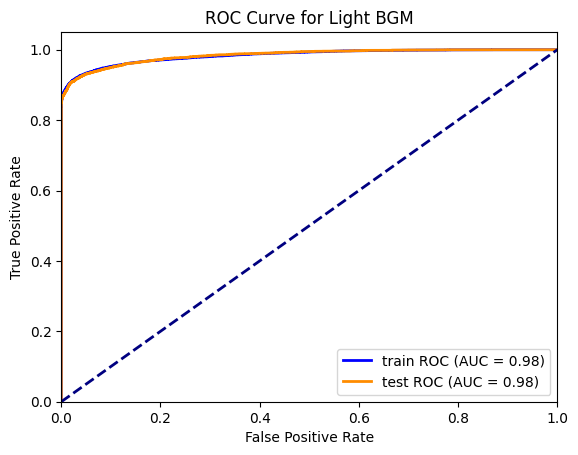

In [ ]:
#对验证集进行预测
y_train_pred = lgbm.predict(X_train, num_iteration=lgbm.best_iteration) #训练集预测概率
y_train_prob = (y_train_prob > 0.5).astype(int) #训练集预测标签
y_test_pred = lgbm.predict(X_test, num_iteration=lgbm.best_iteration) #测试集预测概率
y_test_prob = (y_test_prob > 0.5).astype(int) #测试集预测标签
metrics_lgb = evaluate_model(y_train, y_train_pred, y_train_prob,
                            y_test, y_test_pred, y_test_prob, 
                            "Light BGM")

没到1491就停止了，设置最大迭代次数为200

In [14]:
params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'metric': 'auc',
            'learning_rate': 0.01,
            'num_leaves': 192,
            'max_depth': 7,
            'min_data_in_leaf': 82,
            'min_child_weight':7.7,
            'bagging_fraction': 0.92,
            'feature_fraction': 0.54,
            'bagging_freq': 27,
            'reg_lambda': 3.4,
            'reg_alpha': 8.8,
            'min_split_gain': 0.5,
            'nthread': 8,
            'seed': 2020,
            'silent': True,
            'verbose': -1,
            }

"""使用训练集数据进行模型训练"""
final_lgbm = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=200, callbacks=[lgb.early_stopping(stopping_rounds=200)])

Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's auc: 0.96893


Evaluation Metrics for Light BGM:
训练集：
  Accuracy: 0.9170
  Precision: 0.9847
  Recall: 0.8465
  F1-Score: 0.9104
  AUC: 0.9685
测试集：
  Accuracy: 0.9132
  Precision: 0.9821
  Recall: 0.8432
  F1-Score: 0.9073
  AUC: 0.9694


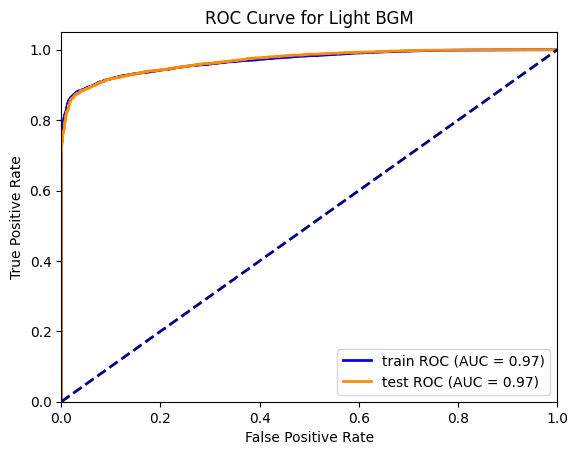

In [15]:
#对验证集进行预测
y_train_prob = final_lgbm.predict(X_train, num_iteration=lgbm.best_iteration) #训练集预测概率
y_train_pred = (y_train_prob > 0.5).astype(int) #训练集预测标签
y_test_prob = final_lgbm.predict(X_test, num_iteration=lgbm.best_iteration) #测试集预测概率
y_test_pred = (y_test_prob > 0.5).astype(int) #测试集预测标签
metrics_lgb = evaluate_model(y_train, y_train_pred, y_train_prob,
                            y_test, y_test_pred, y_test_prob, 
                            "Light BGM")

减少了过拟合

In [16]:
"""保存模型到本地"""
# 保存模型
import pickle
pickle.dump(final_lgbm, open('/Users/lixian/workplace/dl_predictionv1/model/model_lgb_best.pkl', 'wb'))

## MLP(多层感知器)

In [20]:
import pickle
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset
from torch import optim
from torchmetrics import Accuracy
from tqdm import tqdm
import joblib  

# 模型输入参数
epochs = 100  # 迭代次数
batch_size = 32  # 每个批次的大小
lr = 0.001  # 学习率
device = 'cpu'  # 使用'cuda'在GPU上训练

# 定义神经网络模型
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim): #输入维度 input_dim 是特征数，隐藏层维度 hidden_dim 是 64，输出维度 output_dim 是 2（二分类任务）
        super(MLP, self).__init__() 
        self.fc1 = nn.Linear(input_dim, hidden_dim) #一个输入层到隐藏层的全连接层c1
        self.relu = nn.ReLU() #ReLU 激活函数
        self.fc2 = nn.Linear(hidden_dim, output_dim) #一个隐藏层到输出层的全连接层（fc2）
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 加载你的数据集
file_path = '/Users/lixian/workplace/dl_predictionv1/data/lucky_cat.csv'  
df = pd.read_csv(file_path)

# 特征和目标变量
X = df.drop(columns=['risk'])  # 删除'risk'列作为特征
y = df['risk']  # 'risk'是目标变量

# 标准化数值特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, '/Users/lixian/workplace/dl_predictionv1/model/scaler.pkl')

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# 将 NumPy 数组转换为 PyTorch 张量，特征用 float32，标签用 long（因为 CrossEntropyLoss 要求标签是整数）
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# 创建数据集和数据加载器，使用 TensorDataset 将特征和标签配对
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

#DataLoader 用于批量加载数据，训练数据打乱（shuffle=True），测试数据不打乱（shuffle=False），这是标准做法
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)


##初始化模型、优化器和损失函数

input_dim = X_train.shape[1]  # 特征的数量
hidden_dim = 64  # 隐藏层的大小
output_dim = 2  # 因为'risk'是二分类任务

model = MLP(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
#使用 Adam 优化器
optimizer = optim.Adam(model.parameters(), lr=lr)
#交叉熵损失函数，用于分类任务
criterion = nn.CrossEntropyLoss()

#将模型移动到指定设备（这里是 CPU）
model.to(device)

# 训练模型
best_acc = 0
best_model = None #保存参数
best_model_real = None
for epoch in range(epochs):
    model.train()  # 设置模型为训练模式
    epoch_loss = 0
    correct_preds = 0
    total_preds = 0

    train_bar = tqdm(train_loader)  # 显示训练进度条
    for data in train_bar:
        X_batch, y_batch = data
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        #清零梯度
        optimizer.zero_grad()

        # 前向传播
        output = model(X_batch)
        
        # 计算平均损失
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        #更新参数
        epoch_loss += loss.item()

        # 计算准确率
        _, predicted = torch.max(output, 1)
        correct_preds += (predicted == y_batch).sum().item()
        total_preds += len(y_batch)

    epoch_acc = correct_preds / total_preds * 100
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}, Accuracy: {epoch_acc:.2f}%")

    # 保存最好的模型（基于准确率）
    if epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_real  = model
        best_model = model.state_dict()

# 保存最优模型的参数
torch.save(best_model,'/Users/lixian/workplace/dl_predictionv1/model/model_mlp_best.pkl')
#保存最优模型
torch.save(best_model_real,'/Users/lixian/workplace/dl_predictionv1/model/model_mlp_best_real.pkl')

# 测试模型
#加载最佳模型
model.load_state_dict(best_model)
#设置为评估模式
model.eval()

correct_preds = 0
total_preds = 0

#使用 torch.no_grad() 禁用梯度计算，节省内存
with torch.no_grad():
    #在测试集上运行推理，计算准确率
    for data in test_loader:
        X_batch, y_batch = data
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        # 前向传播
        output = model(X_batch)
        
        # 计算准确率
        _, predicted = torch.max(output, 1)
        correct_preds += (predicted == y_batch).sum().item()
        total_preds += len(y_batch)

test_acc = correct_preds / total_preds * 100
print(f"Test Accuracy: {test_acc:.2f}%")

100%|██████████| 1101/1101 [00:00<00:00, 1749.96it/s]


Epoch [1/100], Loss: 0.5446, Accuracy: 72.54%


100%|██████████| 1101/1101 [00:00<00:00, 2282.76it/s]


Epoch [2/100], Loss: 0.4541, Accuracy: 78.65%


100%|██████████| 1101/1101 [00:00<00:00, 2255.86it/s]


Epoch [3/100], Loss: 0.4039, Accuracy: 81.59%


100%|██████████| 1101/1101 [00:00<00:00, 2216.42it/s]


Epoch [4/100], Loss: 0.3715, Accuracy: 83.23%


100%|██████████| 1101/1101 [00:00<00:00, 2191.06it/s]


Epoch [5/100], Loss: 0.3456, Accuracy: 84.65%


100%|██████████| 1101/1101 [00:00<00:00, 2133.56it/s]


Epoch [6/100], Loss: 0.3294, Accuracy: 85.55%


100%|██████████| 1101/1101 [00:00<00:00, 2088.18it/s]


Epoch [7/100], Loss: 0.3143, Accuracy: 86.23%


100%|██████████| 1101/1101 [00:00<00:00, 1973.55it/s]


Epoch [8/100], Loss: 0.3034, Accuracy: 86.89%


100%|██████████| 1101/1101 [00:00<00:00, 2149.35it/s]


Epoch [9/100], Loss: 0.2932, Accuracy: 87.25%


100%|██████████| 1101/1101 [00:00<00:00, 2161.44it/s]


Epoch [10/100], Loss: 0.2861, Accuracy: 87.72%


100%|██████████| 1101/1101 [00:00<00:00, 2131.32it/s]


Epoch [11/100], Loss: 0.2793, Accuracy: 87.85%


100%|██████████| 1101/1101 [00:00<00:00, 2141.81it/s]


Epoch [12/100], Loss: 0.2734, Accuracy: 88.29%


100%|██████████| 1101/1101 [00:00<00:00, 2121.87it/s]


Epoch [13/100], Loss: 0.2666, Accuracy: 88.56%


100%|██████████| 1101/1101 [00:00<00:00, 2098.50it/s]


Epoch [14/100], Loss: 0.2625, Accuracy: 88.81%


100%|██████████| 1101/1101 [00:00<00:00, 2077.73it/s]


Epoch [15/100], Loss: 0.2598, Accuracy: 88.78%


100%|██████████| 1101/1101 [00:00<00:00, 2069.54it/s]


Epoch [16/100], Loss: 0.2553, Accuracy: 89.08%


100%|██████████| 1101/1101 [00:00<00:00, 1838.85it/s]


Epoch [17/100], Loss: 0.2505, Accuracy: 89.25%


100%|██████████| 1101/1101 [00:00<00:00, 2042.10it/s]


Epoch [18/100], Loss: 0.2478, Accuracy: 89.41%


100%|██████████| 1101/1101 [00:00<00:00, 2015.00it/s]


Epoch [19/100], Loss: 0.2462, Accuracy: 89.43%


100%|██████████| 1101/1101 [00:00<00:00, 2015.28it/s]


Epoch [20/100], Loss: 0.2425, Accuracy: 89.82%


100%|██████████| 1101/1101 [00:00<00:00, 1994.50it/s]


Epoch [21/100], Loss: 0.2400, Accuracy: 89.85%


100%|██████████| 1101/1101 [00:00<00:00, 1216.60it/s]


Epoch [22/100], Loss: 0.2371, Accuracy: 89.93%


100%|██████████| 1101/1101 [00:00<00:00, 1763.46it/s]


Epoch [23/100], Loss: 0.2369, Accuracy: 90.06%


100%|██████████| 1101/1101 [00:00<00:00, 1772.06it/s]


Epoch [24/100], Loss: 0.2351, Accuracy: 90.00%


100%|██████████| 1101/1101 [00:00<00:00, 1757.23it/s]


Epoch [25/100], Loss: 0.2313, Accuracy: 90.23%


100%|██████████| 1101/1101 [00:00<00:00, 1969.03it/s]


Epoch [26/100], Loss: 0.2296, Accuracy: 90.28%


100%|██████████| 1101/1101 [00:00<00:00, 1949.28it/s]


Epoch [27/100], Loss: 0.2282, Accuracy: 90.18%


100%|██████████| 1101/1101 [00:00<00:00, 1942.89it/s]


Epoch [28/100], Loss: 0.2271, Accuracy: 90.51%


100%|██████████| 1101/1101 [00:00<00:00, 1920.19it/s]


Epoch [29/100], Loss: 0.2245, Accuracy: 90.48%


100%|██████████| 1101/1101 [00:00<00:00, 1998.79it/s]


Epoch [30/100], Loss: 0.2244, Accuracy: 90.61%


100%|██████████| 1101/1101 [00:00<00:00, 2002.89it/s]


Epoch [31/100], Loss: 0.2220, Accuracy: 90.71%


100%|██████████| 1101/1101 [00:00<00:00, 2008.24it/s]


Epoch [32/100], Loss: 0.2214, Accuracy: 90.66%


100%|██████████| 1101/1101 [00:00<00:00, 1997.87it/s]


Epoch [33/100], Loss: 0.2202, Accuracy: 90.74%


100%|██████████| 1101/1101 [00:00<00:00, 2002.09it/s]


Epoch [34/100], Loss: 0.2199, Accuracy: 90.57%


100%|██████████| 1101/1101 [00:00<00:00, 1821.71it/s]


Epoch [35/100], Loss: 0.2192, Accuracy: 90.73%


100%|██████████| 1101/1101 [00:00<00:00, 1992.40it/s]


Epoch [36/100], Loss: 0.2164, Accuracy: 90.84%


100%|██████████| 1101/1101 [00:00<00:00, 1985.64it/s]


Epoch [37/100], Loss: 0.2158, Accuracy: 90.88%


100%|██████████| 1101/1101 [00:00<00:00, 1980.24it/s]


Epoch [38/100], Loss: 0.2159, Accuracy: 90.74%


100%|██████████| 1101/1101 [00:00<00:00, 1924.49it/s]


Epoch [39/100], Loss: 0.2140, Accuracy: 90.99%


100%|██████████| 1101/1101 [00:00<00:00, 1912.93it/s]


Epoch [40/100], Loss: 0.2133, Accuracy: 91.01%


100%|██████████| 1101/1101 [00:00<00:00, 1877.41it/s]


Epoch [41/100], Loss: 0.2124, Accuracy: 91.04%


100%|██████████| 1101/1101 [00:00<00:00, 1954.35it/s]


Epoch [42/100], Loss: 0.2108, Accuracy: 91.07%


100%|██████████| 1101/1101 [00:00<00:00, 1966.66it/s]


Epoch [43/100], Loss: 0.2124, Accuracy: 91.12%


100%|██████████| 1101/1101 [00:00<00:00, 1969.35it/s]


Epoch [44/100], Loss: 0.2113, Accuracy: 90.97%


100%|██████████| 1101/1101 [00:00<00:00, 1930.39it/s]


Epoch [45/100], Loss: 0.2114, Accuracy: 91.26%


100%|██████████| 1101/1101 [00:00<00:00, 1794.64it/s]


Epoch [46/100], Loss: 0.2095, Accuracy: 91.26%


100%|██████████| 1101/1101 [00:00<00:00, 1957.65it/s]


Epoch [47/100], Loss: 0.2083, Accuracy: 91.19%


100%|██████████| 1101/1101 [00:00<00:00, 1967.49it/s]


Epoch [48/100], Loss: 0.2098, Accuracy: 91.07%


100%|██████████| 1101/1101 [00:00<00:00, 1967.53it/s]


Epoch [49/100], Loss: 0.2084, Accuracy: 91.12%


100%|██████████| 1101/1101 [00:00<00:00, 1951.56it/s]


Epoch [50/100], Loss: 0.2065, Accuracy: 91.32%


100%|██████████| 1101/1101 [00:00<00:00, 1959.46it/s]


Epoch [51/100], Loss: 0.2065, Accuracy: 91.34%


100%|██████████| 1101/1101 [00:00<00:00, 1955.20it/s]


Epoch [52/100], Loss: 0.2040, Accuracy: 91.34%


100%|██████████| 1101/1101 [00:00<00:00, 1944.05it/s]


Epoch [53/100], Loss: 0.2056, Accuracy: 91.32%


100%|██████████| 1101/1101 [00:00<00:00, 1947.84it/s]


Epoch [54/100], Loss: 0.2047, Accuracy: 91.46%


100%|██████████| 1101/1101 [00:00<00:00, 1930.00it/s]


Epoch [55/100], Loss: 0.2040, Accuracy: 91.28%


100%|██████████| 1101/1101 [00:00<00:00, 1772.22it/s]


Epoch [56/100], Loss: 0.2050, Accuracy: 91.36%


100%|██████████| 1101/1101 [00:00<00:00, 1920.44it/s]


Epoch [57/100], Loss: 0.2025, Accuracy: 91.42%


100%|██████████| 1101/1101 [00:00<00:00, 1927.25it/s]


Epoch [58/100], Loss: 0.2011, Accuracy: 91.38%


100%|██████████| 1101/1101 [00:00<00:00, 1917.04it/s]


Epoch [59/100], Loss: 0.2013, Accuracy: 91.66%


100%|██████████| 1101/1101 [00:00<00:00, 1943.99it/s]


Epoch [60/100], Loss: 0.2013, Accuracy: 91.60%


100%|██████████| 1101/1101 [00:00<00:00, 1810.48it/s]


Epoch [61/100], Loss: 0.2017, Accuracy: 91.42%


100%|██████████| 1101/1101 [00:00<00:00, 1903.55it/s]


Epoch [62/100], Loss: 0.1995, Accuracy: 91.54%


100%|██████████| 1101/1101 [00:00<00:00, 1923.06it/s]


Epoch [63/100], Loss: 0.1986, Accuracy: 91.45%


100%|██████████| 1101/1101 [00:00<00:00, 1902.08it/s]


Epoch [64/100], Loss: 0.1988, Accuracy: 91.60%


100%|██████████| 1101/1101 [00:00<00:00, 1592.51it/s]


Epoch [65/100], Loss: 0.1974, Accuracy: 91.66%


100%|██████████| 1101/1101 [00:00<00:00, 1694.95it/s]


Epoch [66/100], Loss: 0.1963, Accuracy: 91.61%


100%|██████████| 1101/1101 [00:00<00:00, 1727.43it/s]


Epoch [67/100], Loss: 0.1961, Accuracy: 91.70%


100%|██████████| 1101/1101 [00:00<00:00, 1902.53it/s]


Epoch [68/100], Loss: 0.1959, Accuracy: 91.69%


100%|██████████| 1101/1101 [00:00<00:00, 1907.24it/s]


Epoch [69/100], Loss: 0.1962, Accuracy: 91.65%


100%|██████████| 1101/1101 [00:00<00:00, 1904.62it/s]


Epoch [70/100], Loss: 0.1963, Accuracy: 91.53%


100%|██████████| 1101/1101 [00:00<00:00, 1889.66it/s]


Epoch [71/100], Loss: 0.1947, Accuracy: 91.75%


100%|██████████| 1101/1101 [00:00<00:00, 1888.65it/s]


Epoch [72/100], Loss: 0.1951, Accuracy: 91.86%


100%|██████████| 1101/1101 [00:00<00:00, 1897.48it/s]


Epoch [73/100], Loss: 0.1942, Accuracy: 91.85%


100%|██████████| 1101/1101 [00:00<00:00, 1901.12it/s]


Epoch [74/100], Loss: 0.1945, Accuracy: 91.81%


100%|██████████| 1101/1101 [00:00<00:00, 1872.78it/s]


Epoch [75/100], Loss: 0.1942, Accuracy: 91.83%


100%|██████████| 1101/1101 [00:00<00:00, 1905.38it/s]


Epoch [76/100], Loss: 0.1948, Accuracy: 91.61%


100%|██████████| 1101/1101 [00:00<00:00, 1739.53it/s]


Epoch [77/100], Loss: 0.1926, Accuracy: 91.82%


100%|██████████| 1101/1101 [00:00<00:00, 1906.16it/s]


Epoch [78/100], Loss: 0.1919, Accuracy: 91.92%


100%|██████████| 1101/1101 [00:00<00:00, 1901.37it/s]


Epoch [79/100], Loss: 0.1926, Accuracy: 91.93%


100%|██████████| 1101/1101 [00:00<00:00, 1901.41it/s]


Epoch [80/100], Loss: 0.1917, Accuracy: 91.92%


100%|██████████| 1101/1101 [00:00<00:00, 1900.75it/s]


Epoch [81/100], Loss: 0.1918, Accuracy: 91.85%


100%|██████████| 1101/1101 [00:00<00:00, 1889.23it/s]


Epoch [82/100], Loss: 0.1906, Accuracy: 91.95%


100%|██████████| 1101/1101 [00:00<00:00, 1900.27it/s]


Epoch [83/100], Loss: 0.1908, Accuracy: 91.89%


100%|██████████| 1101/1101 [00:00<00:00, 1900.14it/s]


Epoch [84/100], Loss: 0.1909, Accuracy: 91.98%


100%|██████████| 1101/1101 [00:00<00:00, 1890.07it/s]


Epoch [85/100], Loss: 0.1901, Accuracy: 91.98%


100%|██████████| 1101/1101 [00:00<00:00, 1870.60it/s]


Epoch [86/100], Loss: 0.1895, Accuracy: 92.01%


100%|██████████| 1101/1101 [00:00<00:00, 1893.49it/s]


Epoch [87/100], Loss: 0.1899, Accuracy: 91.94%


100%|██████████| 1101/1101 [00:00<00:00, 1753.96it/s]


Epoch [88/100], Loss: 0.1898, Accuracy: 92.05%


100%|██████████| 1101/1101 [00:00<00:00, 1889.47it/s]


Epoch [89/100], Loss: 0.1890, Accuracy: 92.09%


100%|██████████| 1101/1101 [00:00<00:00, 1894.67it/s]


Epoch [90/100], Loss: 0.1905, Accuracy: 92.06%


100%|██████████| 1101/1101 [00:00<00:00, 1883.62it/s]


Epoch [91/100], Loss: 0.1885, Accuracy: 92.04%


100%|██████████| 1101/1101 [00:00<00:00, 1885.74it/s]


Epoch [92/100], Loss: 0.1881, Accuracy: 91.98%


100%|██████████| 1101/1101 [00:00<00:00, 1866.35it/s]


Epoch [93/100], Loss: 0.1881, Accuracy: 92.10%


100%|██████████| 1101/1101 [00:00<00:00, 1877.43it/s]


Epoch [94/100], Loss: 0.1875, Accuracy: 92.16%


100%|██████████| 1101/1101 [00:00<00:00, 1848.87it/s]


Epoch [95/100], Loss: 0.1875, Accuracy: 92.09%


100%|██████████| 1101/1101 [00:00<00:00, 1868.02it/s]


Epoch [96/100], Loss: 0.1890, Accuracy: 92.11%


100%|██████████| 1101/1101 [00:00<00:00, 1883.01it/s]


Epoch [97/100], Loss: 0.1876, Accuracy: 92.09%


100%|██████████| 1101/1101 [00:00<00:00, 1723.91it/s]


Epoch [98/100], Loss: 0.1870, Accuracy: 92.14%


100%|██████████| 1101/1101 [00:00<00:00, 1872.80it/s]


Epoch [99/100], Loss: 0.1872, Accuracy: 92.05%


100%|██████████| 1101/1101 [00:00<00:00, 1864.22it/s]


Epoch [100/100], Loss: 0.1859, Accuracy: 92.13%
Test Accuracy: 88.66%


Evaluation Metrics for MLP:
训练集：
  Accuracy: 0.9240
  Precision: 0.9317
  Recall: 0.9150
  F1-Score: 0.9233
  AUC: 0.9799
测试集：
  Accuracy: 0.8866
  Precision: 0.8876
  Recall: 0.8858
  F1-Score: 0.8867
  AUC: 0.9573


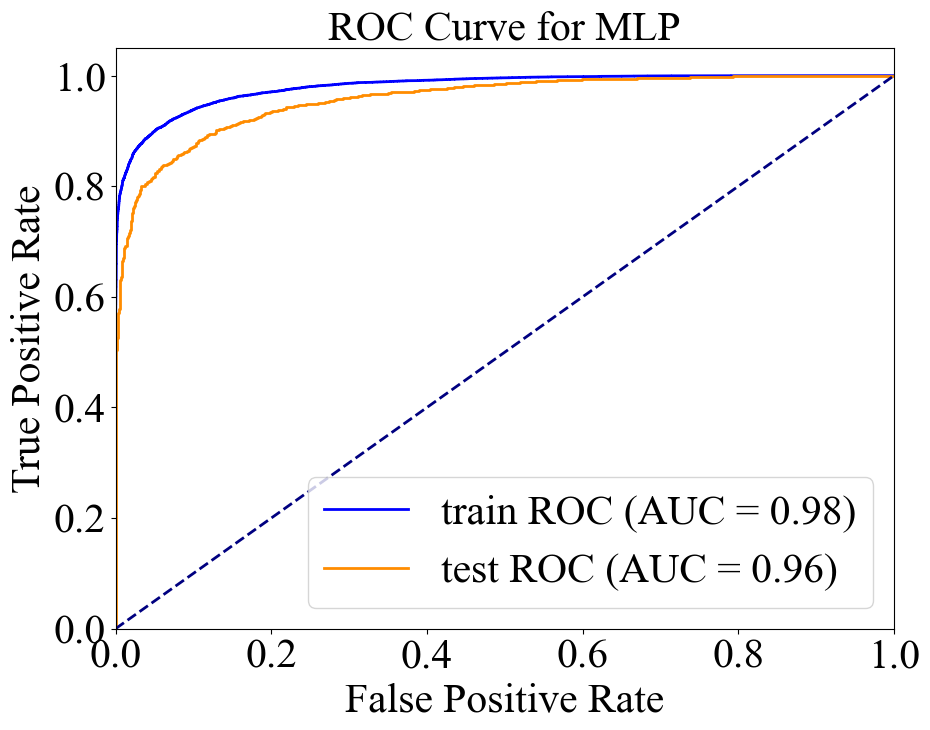

In [21]:
import torch
import torch.nn.functional as F

def predict_with_model(best_model_state, X_data, device):
    # 重新创建模型实例
    model = MLP(input_dim=37, hidden_dim=64, output_dim=2)
    # 加载最佳模型参数
    model.load_state_dict(best_model_state)
    # 将数据转为tensor并移动到相应的设备
    X_data_tensor = torch.tensor(X_data, dtype=torch.float32).to(device)
    
    # 模型预测
    model.eval()  # 设置为评估模式
    with torch.no_grad():
        outputs = model(X_data_tensor)  # 获取模型输出
        # 计算预测的标签和预测概率
        _, predicted = torch.max(outputs, 1)  # 预测的标签
        predicted_prob = F.softmax(outputs, dim=1)[:, 1].cpu().numpy()  # 正类的预测概率
    return predicted.cpu().numpy(), predicted_prob

# 获取训练集和测试集的预测结果
y_train_pred, y_train_prob = predict_with_model(best_model, X_train, device)
y_test_pred, y_test_prob = predict_with_model(best_model, X_test, device)

# 调用evaluate_model进行评估
metrics_mlp = evaluate_model(y_train, y_train_pred, y_train_prob,
                             y_test, y_test_pred, y_test_prob, 
                             "MLP")


## CNN（卷积神经网络）

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# 加载数据
file_path = '/Users/lixian/workplace/dl_predictionv1/data/lucky_cat.csv'  
data = pd.read_csv(file_path)

# 提取特征和目标变量
X = data.drop(columns=['risk'])
y = data['risk']

# 对特征进行标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# 将数据转为PyTorch张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # 添加通道维度 (batch_size, 1, num_features)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# 创建数据集和数据加载器
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# 定义CNN模型
class CNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(CNN, self).__init__()
        # 1D卷积层
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(2)
        # Calculate the size after two pooling operations
        self.fc_input_dim = 64 * (input_dim // 4)  # input_dim // 4 because of two pooling layers
        self.fc1 = nn.Linear(self.fc_input_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # Conv + ReLU + MaxPool
        x = self.pool(torch.relu(self.conv2(x)))  # Conv + ReLU + MaxPool
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = torch.relu(self.fc1(x))  # Fully connected layer
        x = self.fc2(x)  # Output layer
        return x

# 初始化模型
input_dim = X_train.shape[1]  # 输入特征的维度
output_dim = 2  # 预测二分类任务（0或1）

model = CNN(input_dim, output_dim)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 对于二分类问题，使用交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
epochs = 20 #最终结果和训练次数有很大的关系
best_acc = 0
best_model = None

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct_preds = 0
    total_preds = 0

    train_bar = tqdm(train_loader)  # 训练进度条
    for data in train_bar:
        X_batch, y_batch = data
        optimizer.zero_grad()
        
        # 前向传播
        outputs = model(X_batch)
        
        # 计算损失
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        
        # 计算准确率
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == y_batch).sum().item()
        total_preds += len(y_batch)

    epoch_acc = correct_preds / total_preds * 100
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}, Accuracy: {epoch_acc:.2f}%")

    if epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model = model.state_dict()

# 保存最优模型
torch.save(best_model,'/Users/lixian/workplace/dl_predictionv1/model/model_cnn_best.pkl')

# 在测试集上评估模型
model.load_state_dict(best_model)
model.eval()

correct_preds = 0
total_preds = 0

with torch.no_grad():
    for data in test_loader:
        X_batch, y_batch = data
        outputs = model(X_batch)
        
        # 计算准确率
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == y_batch).sum().item()
        total_preds += len(y_batch)

test_acc = correct_preds / total_preds * 100
print(f"Test Accuracy: {test_acc:.2f}%")

100%|██████████| 1101/1101 [00:04<00:00, 268.43it/s]


Epoch [1/10], Loss: 0.4225, Accuracy: 79.88%


100%|██████████| 1101/1101 [00:05<00:00, 214.90it/s]


Epoch [2/10], Loss: 0.3134, Accuracy: 85.84%


100%|██████████| 1101/1101 [00:03<00:00, 281.78it/s]


Epoch [3/10], Loss: 0.2796, Accuracy: 87.73%


100%|██████████| 1101/1101 [00:03<00:00, 288.43it/s]


Epoch [4/10], Loss: 0.2645, Accuracy: 88.44%


100%|██████████| 1101/1101 [00:03<00:00, 282.23it/s]


Epoch [5/10], Loss: 0.2515, Accuracy: 88.95%


100%|██████████| 1101/1101 [00:03<00:00, 292.17it/s]


Epoch [6/10], Loss: 0.2427, Accuracy: 89.26%


100%|██████████| 1101/1101 [00:03<00:00, 286.29it/s]


Epoch [7/10], Loss: 0.2318, Accuracy: 89.86%


100%|██████████| 1101/1101 [00:03<00:00, 283.21it/s]


Epoch [8/10], Loss: 0.2232, Accuracy: 90.21%


100%|██████████| 1101/1101 [00:03<00:00, 284.45it/s]


Epoch [9/10], Loss: 0.2160, Accuracy: 90.65%


100%|██████████| 1101/1101 [00:03<00:00, 282.07it/s]


Epoch [10/10], Loss: 0.2065, Accuracy: 91.26%
Test Accuracy: 89.42%


Evaluation Metrics for CNN:
训练集：
  Accuracy: 0.9224
  Precision: 0.9303
  Recall: 0.9132
  F1-Score: 0.9216
  AUC: 0.9774
测试集：
  Accuracy: 0.8942
  Precision: 0.9035
  Recall: 0.8833
  F1-Score: 0.8933
  AUC: 0.9618


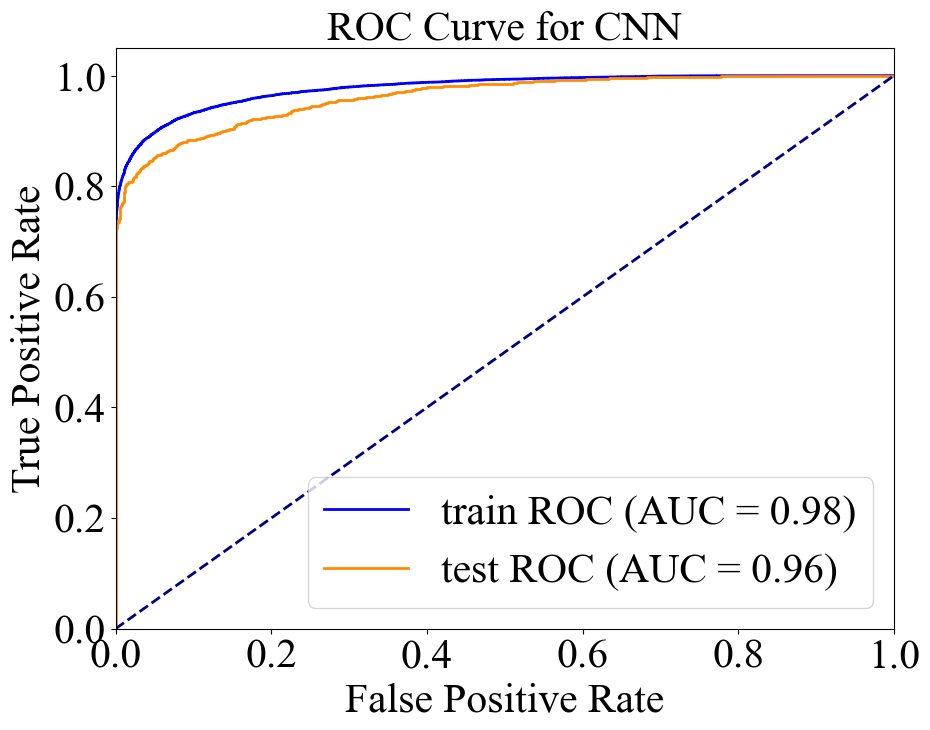

In [7]:
import torch
import torch.nn.functional as F

# 定义设备
device = 'cpu'  # 因为CNN是在CPU上训练的

# 用模型对训练集和测试集进行预测
def predict_with_model(model, X_data, device):
    # 将数据转为tensor并移动到相应的设备
    X_data_tensor = torch.tensor(X_data, dtype=torch.float32).to(device)
    # 如果输入数据缺少通道维度（例如对于CNN），则在第1维添加
    if X_data_tensor.dim() == 2:
        X_data_tensor = X_data_tensor.unsqueeze(1)
        
    model.eval()  # 设置为评估模式
    with torch.no_grad():
        outputs = model(X_data_tensor)  # 获取模型输出
        
        # 如果输出只有一列，则说明模型为二分类单输出logit，采用sigmoid
        if outputs.dim() == 1 or outputs.size(1) == 1:
            predicted_prob = torch.sigmoid(outputs)
            predicted = (predicted_prob > 0.5).long()
        else:
            _, predicted = torch.max(outputs, 1)  # 预测的标签
            predicted_prob = F.softmax(outputs, dim=1)[:, 1]  # 正类的预测概率

    return predicted.cpu().numpy(), predicted_prob.cpu().numpy()

# 假设model已定义为对应的CNN模型，并且best_model是保存的模型参数
model.load_state_dict(best_model)

# 获取训练集和测试集的预测结果
y_train_pred, y_train_prob = predict_with_model(model, X_train, device)
y_test_pred, y_test_prob = predict_with_model(model, X_test, device)

# 调用evaluate_model进行评估
metrics_CNN = evaluate_model(y_train, y_train_pred, y_train_prob,
                             y_test, y_test_pred, y_test_prob, 
                             "CNN")


## RNN（循环神经网络）

100%|██████████| 1101/1101 [00:00<00:00, 1501.61it/s]


Epoch [1/50], Loss: 0.5801, Accuracy: 69.54%


100%|██████████| 1101/1101 [00:00<00:00, 1409.66it/s]


Epoch [2/50], Loss: 0.5584, Accuracy: 71.44%


100%|██████████| 1101/1101 [00:00<00:00, 1264.00it/s]


Epoch [3/50], Loss: 0.5308, Accuracy: 73.42%


100%|██████████| 1101/1101 [00:00<00:00, 1278.00it/s]


Epoch [4/50], Loss: 0.4922, Accuracy: 76.12%


100%|██████████| 1101/1101 [00:00<00:00, 1392.10it/s]


Epoch [5/50], Loss: 0.4545, Accuracy: 78.22%


100%|██████████| 1101/1101 [00:00<00:00, 1434.76it/s]


Epoch [6/50], Loss: 0.4187, Accuracy: 80.43%


100%|██████████| 1101/1101 [00:00<00:00, 1466.19it/s]


Epoch [7/50], Loss: 0.3913, Accuracy: 81.91%


100%|██████████| 1101/1101 [00:00<00:00, 1494.39it/s]


Epoch [8/50], Loss: 0.3696, Accuracy: 83.29%


100%|██████████| 1101/1101 [00:00<00:00, 1490.61it/s]


Epoch [9/50], Loss: 0.3506, Accuracy: 84.22%


100%|██████████| 1101/1101 [00:00<00:00, 1475.80it/s]


Epoch [10/50], Loss: 0.3340, Accuracy: 85.13%


100%|██████████| 1101/1101 [00:00<00:00, 1488.64it/s]


Epoch [11/50], Loss: 0.3205, Accuracy: 85.76%


100%|██████████| 1101/1101 [00:00<00:00, 1484.01it/s]


Epoch [12/50], Loss: 0.3086, Accuracy: 86.53%


100%|██████████| 1101/1101 [00:00<00:00, 1476.51it/s]


Epoch [13/50], Loss: 0.2974, Accuracy: 87.00%


100%|██████████| 1101/1101 [00:00<00:00, 1424.96it/s]


Epoch [14/50], Loss: 0.2891, Accuracy: 87.48%


100%|██████████| 1101/1101 [00:00<00:00, 1441.60it/s]


Epoch [15/50], Loss: 0.2813, Accuracy: 87.79%


100%|██████████| 1101/1101 [00:00<00:00, 1450.73it/s]


Epoch [16/50], Loss: 0.2750, Accuracy: 87.98%


100%|██████████| 1101/1101 [00:00<00:00, 1489.82it/s]


Epoch [17/50], Loss: 0.2678, Accuracy: 88.45%


100%|██████████| 1101/1101 [00:00<00:00, 1483.01it/s]


Epoch [18/50], Loss: 0.2640, Accuracy: 88.67%


100%|██████████| 1101/1101 [00:00<00:00, 1480.01it/s]


Epoch [19/50], Loss: 0.2577, Accuracy: 89.00%


100%|██████████| 1101/1101 [00:00<00:00, 1488.78it/s]


Epoch [20/50], Loss: 0.2522, Accuracy: 89.11%


100%|██████████| 1101/1101 [00:00<00:00, 1483.59it/s]


Epoch [21/50], Loss: 0.2497, Accuracy: 89.38%


100%|██████████| 1101/1101 [00:00<00:00, 1488.46it/s]


Epoch [22/50], Loss: 0.2450, Accuracy: 89.52%


100%|██████████| 1101/1101 [00:00<00:00, 1486.17it/s]


Epoch [23/50], Loss: 0.2422, Accuracy: 89.59%


100%|██████████| 1101/1101 [00:00<00:00, 1485.69it/s]


Epoch [24/50], Loss: 0.2393, Accuracy: 89.85%


100%|██████████| 1101/1101 [00:00<00:00, 1494.35it/s]


Epoch [25/50], Loss: 0.2358, Accuracy: 89.96%


100%|██████████| 1101/1101 [00:00<00:00, 1384.49it/s]


Epoch [26/50], Loss: 0.2334, Accuracy: 90.04%


100%|██████████| 1101/1101 [00:00<00:00, 1419.02it/s]


Epoch [27/50], Loss: 0.2315, Accuracy: 90.13%


100%|██████████| 1101/1101 [00:00<00:00, 1479.66it/s]


Epoch [28/50], Loss: 0.2292, Accuracy: 90.29%


100%|██████████| 1101/1101 [00:00<00:00, 1493.84it/s]


Epoch [29/50], Loss: 0.2271, Accuracy: 90.36%


100%|██████████| 1101/1101 [00:00<00:00, 1468.47it/s]


Epoch [30/50], Loss: 0.2247, Accuracy: 90.36%


100%|██████████| 1101/1101 [00:00<00:00, 1485.60it/s]


Epoch [31/50], Loss: 0.2228, Accuracy: 90.52%


100%|██████████| 1101/1101 [00:00<00:00, 1494.01it/s]


Epoch [32/50], Loss: 0.2206, Accuracy: 90.72%


100%|██████████| 1101/1101 [00:00<00:00, 1486.12it/s]


Epoch [33/50], Loss: 0.2198, Accuracy: 90.69%


100%|██████████| 1101/1101 [00:00<00:00, 1491.27it/s]


Epoch [34/50], Loss: 0.2186, Accuracy: 90.68%


100%|██████████| 1101/1101 [00:00<00:00, 1496.02it/s]


Epoch [35/50], Loss: 0.2174, Accuracy: 90.80%


100%|██████████| 1101/1101 [00:00<00:00, 1479.38it/s]


Epoch [36/50], Loss: 0.2149, Accuracy: 90.74%


100%|██████████| 1101/1101 [00:00<00:00, 1487.08it/s]


Epoch [37/50], Loss: 0.2138, Accuracy: 90.88%


100%|██████████| 1101/1101 [00:00<00:00, 1425.77it/s]


Epoch [38/50], Loss: 0.2132, Accuracy: 90.90%


100%|██████████| 1101/1101 [00:00<00:00, 1473.54it/s]


Epoch [39/50], Loss: 0.2120, Accuracy: 91.07%


100%|██████████| 1101/1101 [00:00<00:00, 1468.53it/s]


Epoch [40/50], Loss: 0.2105, Accuracy: 91.05%


100%|██████████| 1101/1101 [00:00<00:00, 1476.02it/s]


Epoch [41/50], Loss: 0.2079, Accuracy: 91.21%


100%|██████████| 1101/1101 [00:00<00:00, 1461.52it/s]


Epoch [42/50], Loss: 0.2087, Accuracy: 91.04%


100%|██████████| 1101/1101 [00:00<00:00, 1471.82it/s]


Epoch [43/50], Loss: 0.2059, Accuracy: 91.27%


100%|██████████| 1101/1101 [00:00<00:00, 1352.65it/s]


Epoch [44/50], Loss: 0.2050, Accuracy: 91.26%


100%|██████████| 1101/1101 [00:00<00:00, 1453.86it/s]


Epoch [45/50], Loss: 0.2041, Accuracy: 91.42%


100%|██████████| 1101/1101 [00:00<00:00, 1402.82it/s]


Epoch [46/50], Loss: 0.2041, Accuracy: 91.36%


100%|██████████| 1101/1101 [00:00<00:00, 1447.70it/s]


Epoch [47/50], Loss: 0.2023, Accuracy: 91.48%


100%|██████████| 1101/1101 [00:00<00:00, 1458.28it/s]


Epoch [48/50], Loss: 0.2013, Accuracy: 91.42%


100%|██████████| 1101/1101 [00:00<00:00, 1341.46it/s]


Epoch [49/50], Loss: 0.2007, Accuracy: 91.46%


100%|██████████| 1101/1101 [00:00<00:00, 1330.57it/s]


Epoch [50/50], Loss: 0.1994, Accuracy: 91.62%
Test Accuracy: 88.83%
Evaluation Metrics for RNN:
训练集：
  Accuracy: 0.9219
  Precision: 0.9305
  Recall: 0.9119
  F1-Score: 0.9211
  AUC: 0.9788
测试集：
  Accuracy: 0.8883
  Precision: 0.8880
  Recall: 0.8894
  F1-Score: 0.8887
  AUC: 0.9599


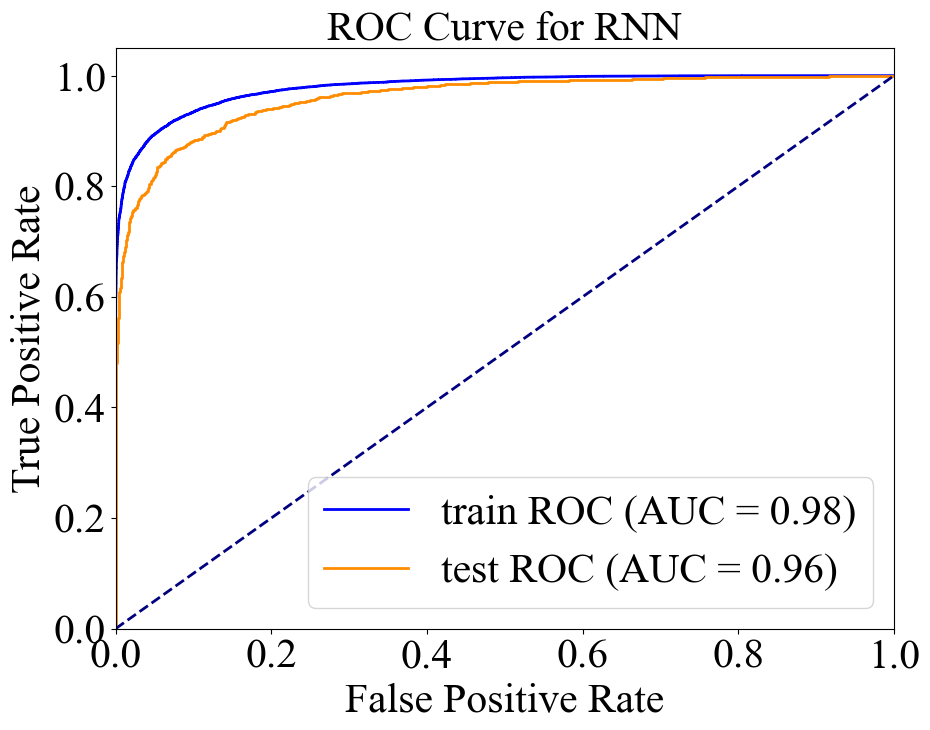

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# 定义RNN模型
class RNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(RNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.rnn = nn.RNN(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # RNN处理输入
        h0 = torch.zeros(1, x.size(0), self.hidden_dim).to(x.device)  # 初始化隐藏状态
        out, _ = self.rnn(x, h0)  # out: (batch_size, seq_length, hidden_dim)
        out = out[:, -1, :]  # 只取最后一个时间步的输出
        out = self.fc(out)  # 全连接层映射到输出
        return out

# 加载数据并处理
file_path = '/Users/lixian/workplace/dl_predictionv1/data/lucky_cat.csv'  

data = pd.read_csv(file_path)

X = data.drop(columns=['risk'])
y = data['risk']

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# 将数据转为PyTorch张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # 添加一个时间步维度
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# 创建数据集和数据加载器
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# 初始化模型
input_dim = X_train.shape[1]  # 输入特征的维度
hidden_dim = 64  # RNN隐层的大小
output_dim = 2  # 二分类任务（0 或 1）

model = RNN(input_dim, hidden_dim, output_dim)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 对于二分类问题，使用交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
epochs = 50
best_acc = 0
best_model = None

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct_preds = 0
    total_preds = 0

    train_bar = tqdm(train_loader)  # 训练进度条
    for data in train_bar:
        X_batch, y_batch = data
        optimizer.zero_grad()
        
        # 前向传播
        outputs = model(X_batch)
        
        # 计算损失
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        
        # 计算准确率
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == y_batch).sum().item()
        total_preds += len(y_batch)

    epoch_acc = correct_preds / total_preds * 100
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}, Accuracy: {epoch_acc:.2f}%")

    if epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model = model.state_dict()

# 保存最优模型
torch.save(best_model,'/Users/lixian/workplace/dl_predictionv1/model/model_rnn_best.pkl')


# 在测试集上评估模型
model.load_state_dict(best_model)
model.eval()

correct_preds = 0
total_preds = 0

with torch.no_grad():
    for data in test_loader:
        X_batch, y_batch = data
        outputs = model(X_batch)
        
        # 计算准确率
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == y_batch).sum().item()
        total_preds += len(y_batch)

test_acc = correct_preds / total_preds * 100
print(f"Test Accuracy: {test_acc:.2f}%")

# 用模型对训练集和测试集进行预测
def predict_with_model(model, X_data, device):
    X_data_tensor = torch.tensor(X_data, dtype=torch.float32).unsqueeze(1).to(device)
    model.eval()  # 设置为评估模式
    with torch.no_grad():
        outputs = model(X_data_tensor)  # 获取模型输出
        _, predicted = torch.max(outputs, 1)  # 预测的标签
        predicted_prob = F.softmax(outputs, dim=1)[:, 1].cpu().numpy()  # 正类的预测概率
    return predicted.cpu().numpy(), predicted_prob

# 获取训练集和测试集的预测结果
y_train_pred, y_train_prob = predict_with_model(model, X_train, device)
y_test_pred, y_test_prob = predict_with_model(model, X_test, device)

# 调用evaluate_model进行评估
metrics_rnn = evaluate_model(y_train, y_train_pred, y_train_prob,
                             y_test, y_test_pred, y_test_prob, 
                             "RNN")
